In [17]:
from pylab import *
from scipy.integrate import *
%matplotlib inline

a) Muestra que en el mapeo los valores subsecuentes son 
$$
\theta_{i+1} = \theta_{i}+ \frac{p_{i+1} \tau}{mR^2}
$$
$$
p_{i+1} = p_i + \epsilon cos \theta_i
$$

donde se ha tomado en cuenta que en el momento en el que la fuerza actua, $\theta$ tenía un valor $\theta_i$

b) Con $\epsilon =0$ usar 200 condiciones iniciales tales que $p_0$ en $[-\pi/2,\pi/2]$ y $\theta$ en $[0,2\pi]$. y encontrar las curvas en el plano ($\theta,p)$ que resultan de muchas iteraciones. Explicar

Definimos las condiciones iniciales aleatorias de  $p_0$ en $[-\pi/2,\pi/2]$ y $\theta$ en $[0,2\pi]$

In [37]:
def cond_ini(limite):
    theta_ini = 2*pi*rand()
    p_ini = (0.5-rand())*pi
    return array([theta_ini,p_ini])

Definimos la funcion de mapeo

In [41]:
def mapeo(theta_p,tau,epsilon):
    p_1 = theta_p[1]+epsilon*cos(theta_p[0])
    theta_1 = theta_p[0]+p_1*tau
    return array([theta_1,p_1])

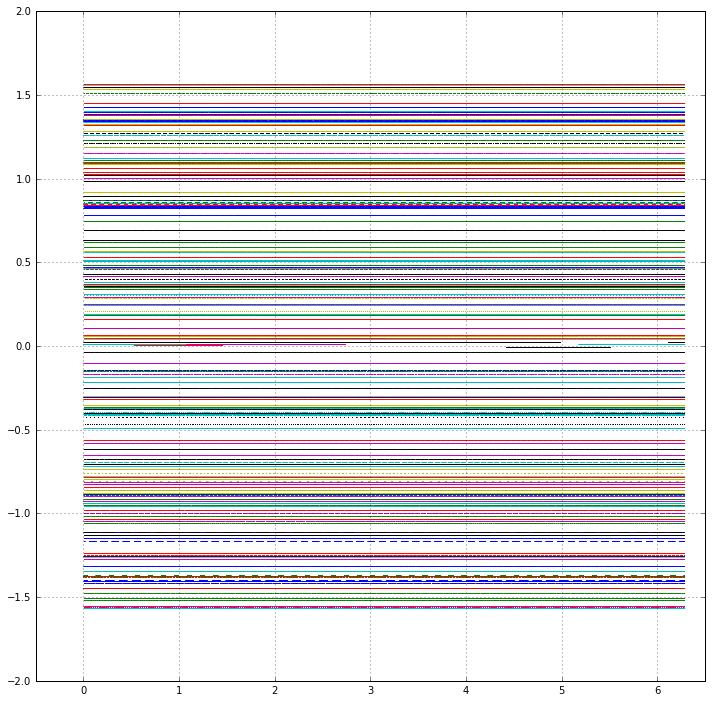

In [65]:
tau = .1
epsilon = 0
t = arange(0,200,tau) # ya que tau =.1, se tienen 2000 interaciones
subplots(figsize=(12,12))

for i in range(200):
        pto = cond_ini(pi/2)
        sol = zeros([len(t),2])
        sol[0] = pto
        for j in range(len(t)-1):
            pto_ini = sol[j]
            sol[j+1]= mapeo(sol[j],tau,epsilon)
            if sol[j+1][0]>=(2*pi):
                 sol[j+1][0]=sol[j+1][0]%(2*pi)
            if sol[j+1][0]<0:
                sol[j+1][0] = 2*pi+sol[j+1][0] 
        theta = [row[0] for row in sol]
        p = [row[1] for row in sol]
        xlim(-.5,6.5)
        plot(theta,p,'.',markersize = .8)
        grid(True)
        
show()


# Se observa que todas las condiciones iniciales generan  rectas en el espacio fase, esto se debe a que no hay pertubaciones ($\epsilon =0$), y por lo tanto los momentos son constantes

c) ¿El sistema tiene puntos fijos para $\epsilon$ distinto de cero? Si esto es así encontrarlos y explicar qué significan estos puntos.

Los puntos fijos son aquellos que cumplen que $\theta_i =\theta_{i +1}$ además que  $p_{i+1} = p_i$


como $p_i = -\epsilon cos \theta_i$ entonces si  $p_{i+1} = 0 \implies p_i = -\epsilon cos \theta_i = 0$
esto pasa cuando  $cos \theta_i = 0  \implies \theta_i = \frac{\pi}{2},\frac{3\pi}{2}$.

por lo tanto se tendran dos posibles puntos fijos $\theta_i = \frac{\pi}{2} $ y $ \theta_i = \frac{3\pi}{2}$


A continuacion se muestra la grafica en el plano $(\theta,p)$ para los puntos fijos y con $\epsilon = 1.1$.

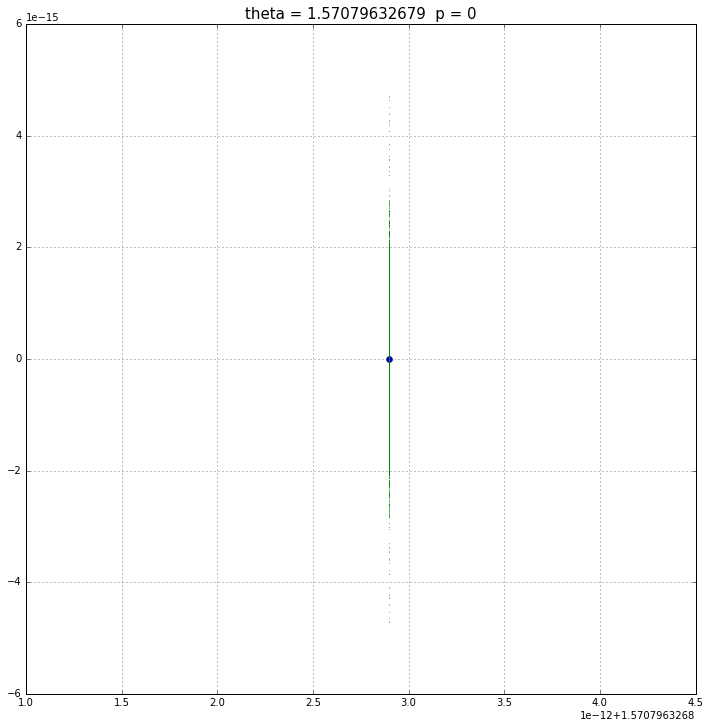

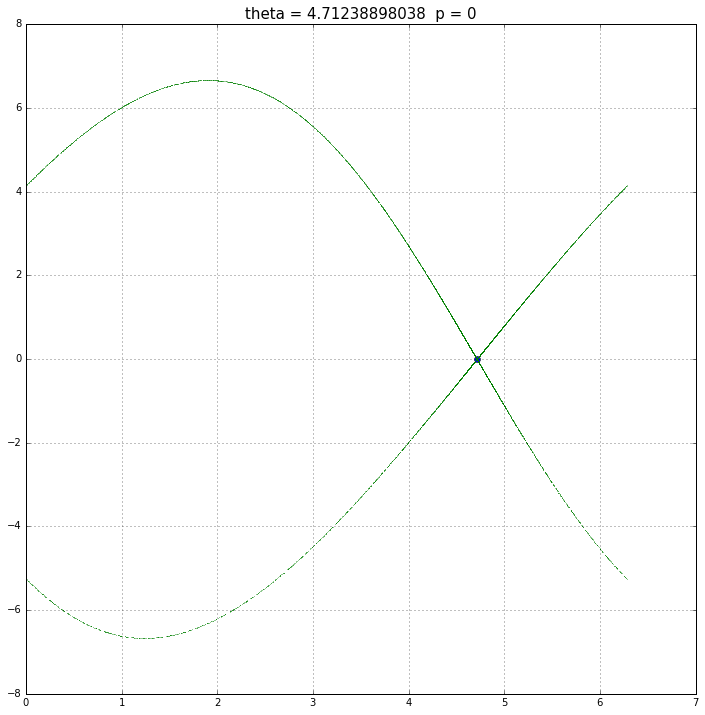

In [100]:
t_ini= array([pi/2,3*pi/2])  # puntos fijos
tau = .1
epsilon= 1.1
t = arange(0,2000,tau)

for i in range(len(t_ini)):
        subplots(figsize=(12,12))
        title('theta = %s  p = 0'%t_ini[i],fontsize=15)
        grid(True)
        pto = [t_ini[i],0]
        plot(pto[0],pto[1],'o')
        sol = zeros([len(t),2])
        sol[0] = pto
        for j in range(len(t)-1):
            sol[j+1]= mapeo(sol[j],tau,epsilon)
            if sol[j+1][0]>=(2*pi):
                 sol[j+1][0]=sol[j+1][0]%(2*pi)
            if sol[j+1][0]<0:
                sol[j+1][0] = 2*pi+sol[j+1][0] 
        theta = [row[0] for row in sol]
        p = [row[1] for row in sol]
        plot(theta,p,'.',markersize = 0.5)
show()

# En la grafica se observa que para el punto fijo donde$\theta_0 =\pi/2$ la variacion posterior de  $\theta$ y p son insignificantes, lo que indica que se trata de un punto fijo 

# Si el sistema se encuentra en un punto inicial fijo y se le aplica una pertubacion la partícula contnuara estatica con momento siempre igual a cero. 

# Como la fuerza perturbativa actua siempre en la misma dirección, existira un ángulo para el cuál la perturbacion tendra direccion radial (en este caso $\theta_0 = \pi/2$). Y dado que la partícula está constreñida a moverse en un círculo, la pertubacion en bajo estas condiciones no afectará el movimiento de la partícula. Bajo estas condiciones y con un momento inicial nulo, la partícula permanecera en un punto fijo.

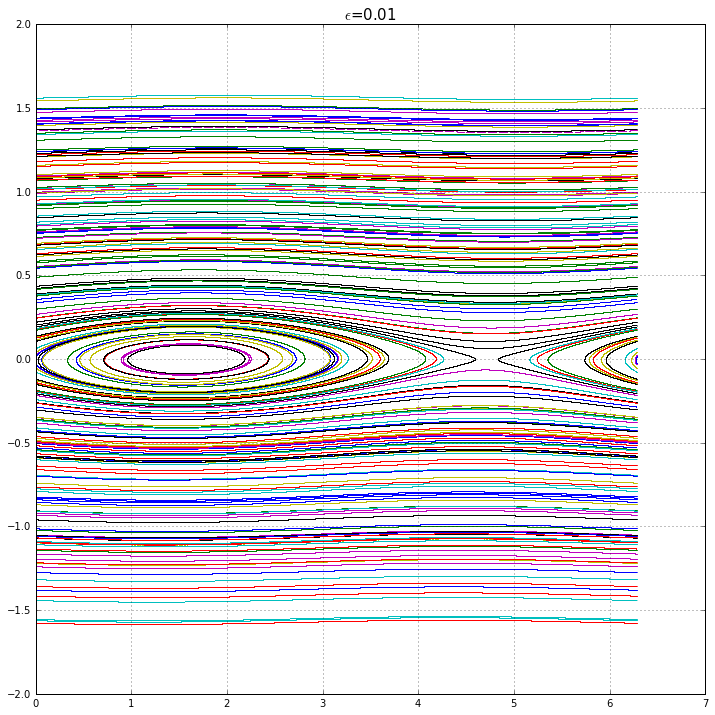

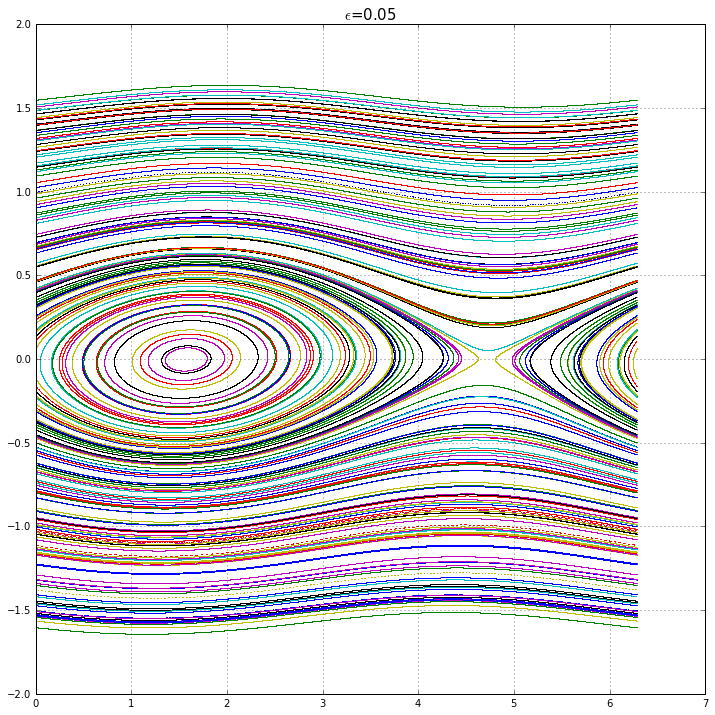

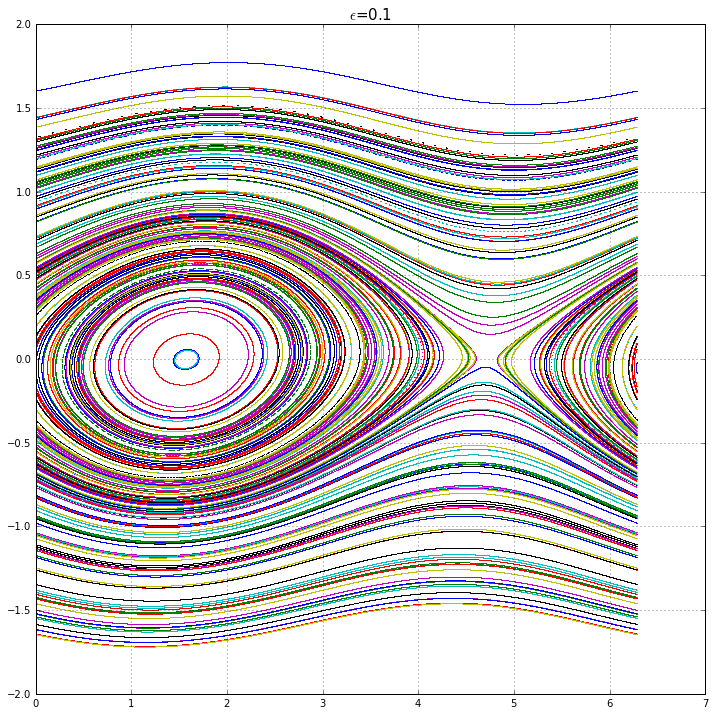

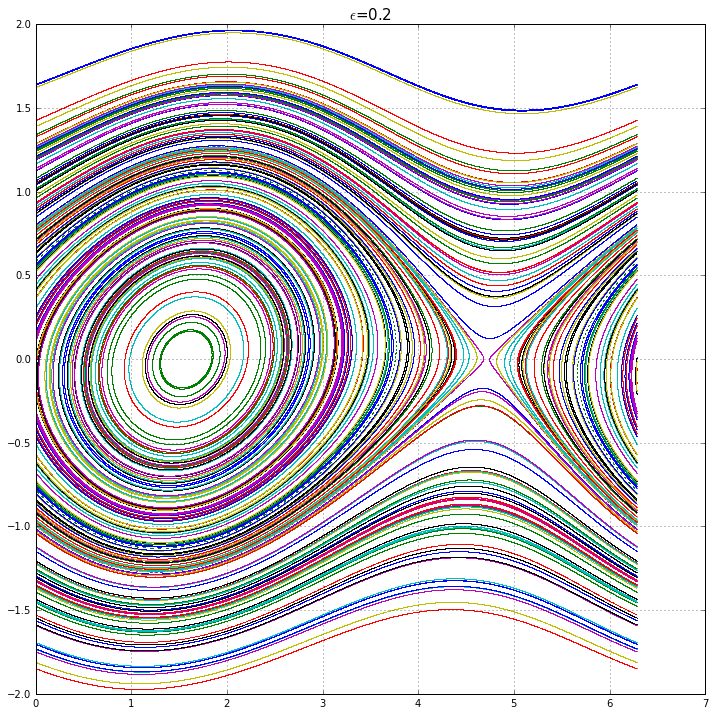

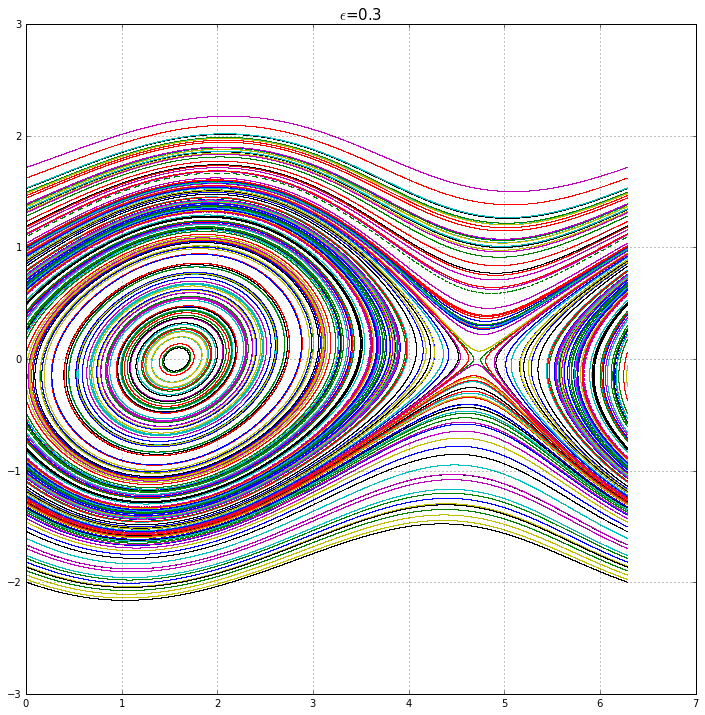

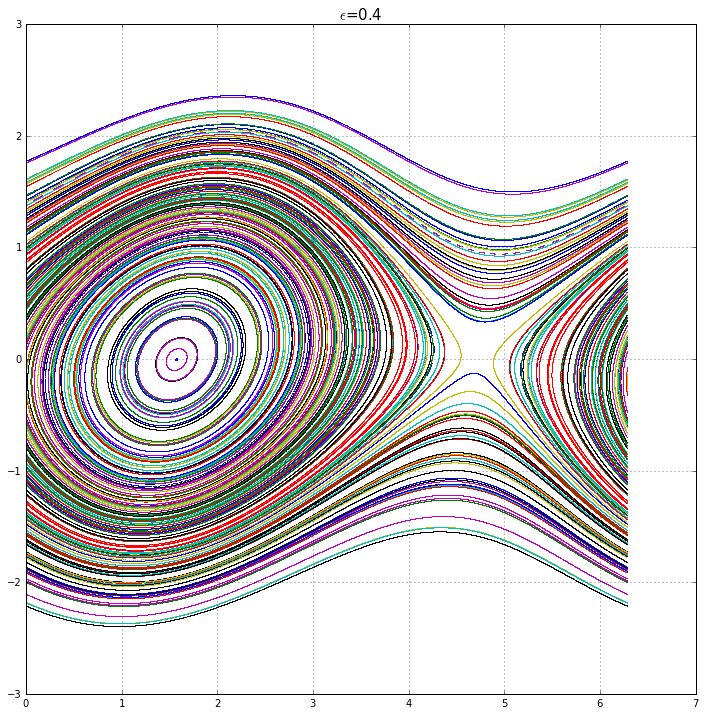

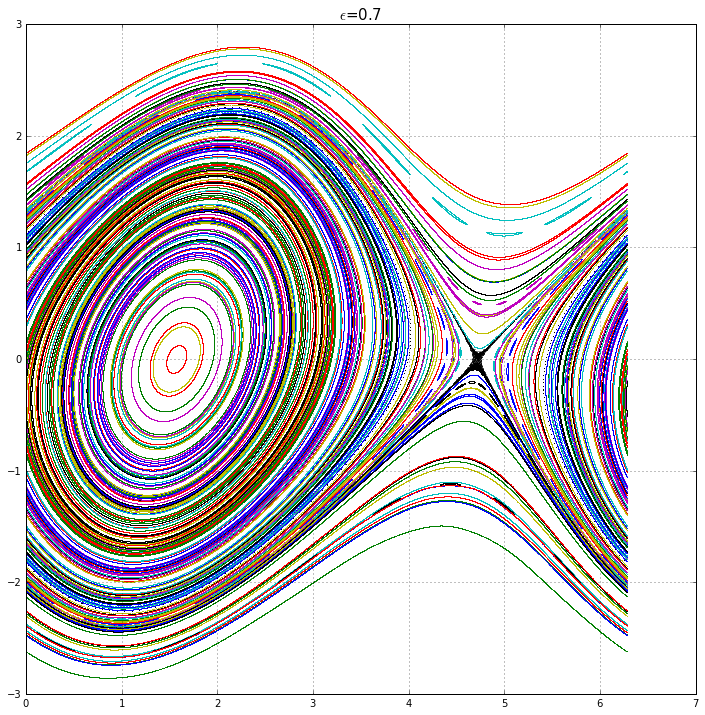

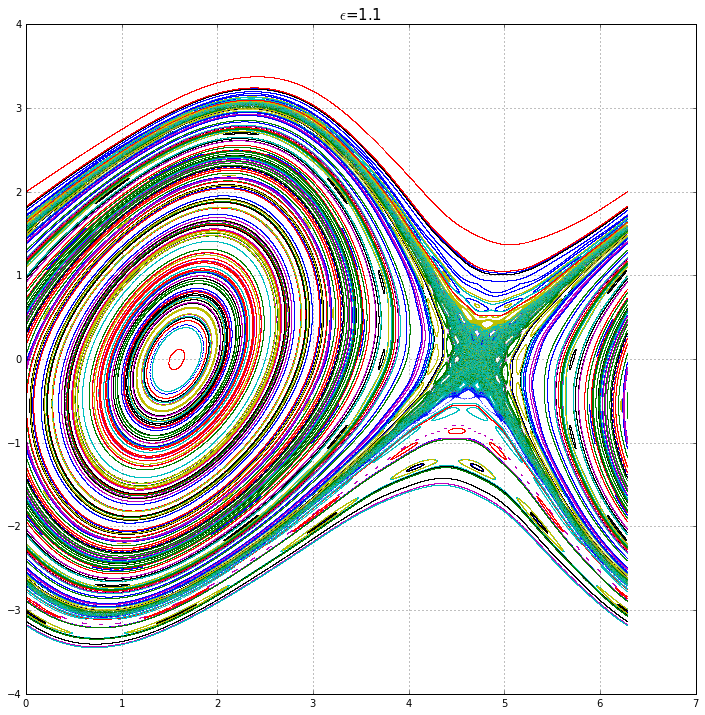

In [105]:
epsilon = array([0.01,0.05,0.1,0.2,0.3,0.4,0.7, 1.1]) # perturbaciones 
tau = .5
for i in range(len(epsilon)):
        grafica =subplots(figsize=(12,12))
        title('$\epsilon$=%s'%epsilon[i],fontsize=15)
        grid(True)
        for j in range(200):
            pto = condiciones(pi/2)
            #plot(pto[0],pto[1],'o')
            sol = zeros([len(t),2])
            sol[0] = pto
            for n in range(len(t)-1):
                sol[n+1]= mapeo(sol[n],tau,epsilon[i])
                if sol[n+1][0]>=(2*pi):
                     sol[n+1][0]=sol[n+1][0]%(2*pi)
                if sol[n+1][0]<0:
                    sol[n+1][0] = 2*pi+sol[n+1][0] 
            theta = [row[0] for row in sol]
            p = [row[1] for row in sol]
            plot(theta,p,'.',markersize = 0.5)
show()

# Se observa que el espacio fase  de la partícula es parecido a lo otenido para  ϵ=0 en un principio , pero al aumentar la magnitud de la perturbación este espacio fase se parece cada ves mas al de un péndulo. 

# En el caso de un pendulo tenemos una fuerza que está siempre dirigida a una misma dirección y sentido ( la gravedad), y que la masa constreñida a moverse a un radio fijo de su punto apoyo. Estas condiciones se asemejan al de la particula de nuestra simulacion

# Si se aumenta aumentando  τ se disminuira la similitud de nuestro sistema y el del pendulo 

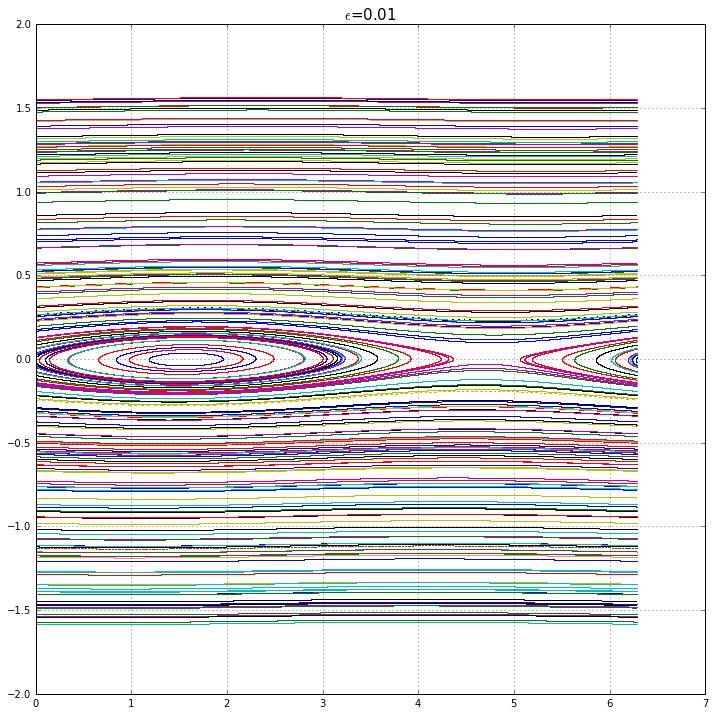

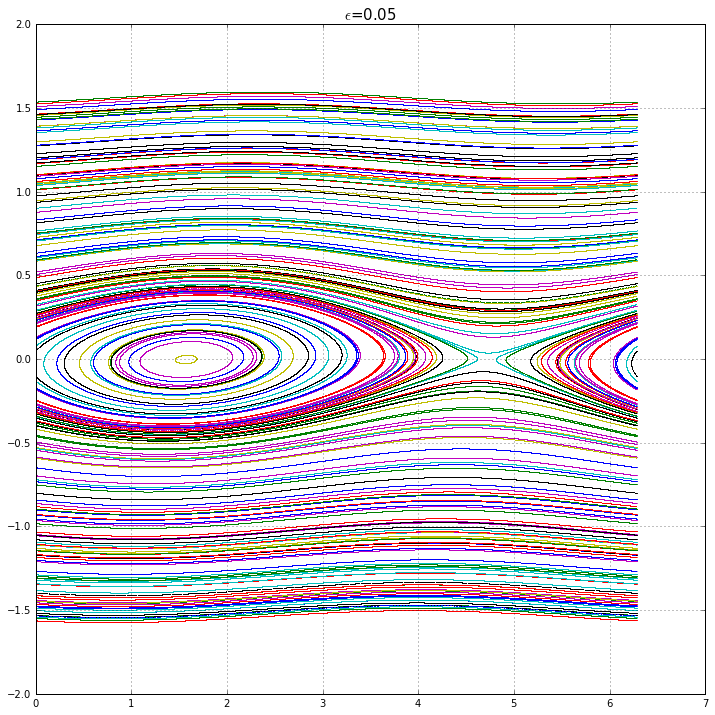

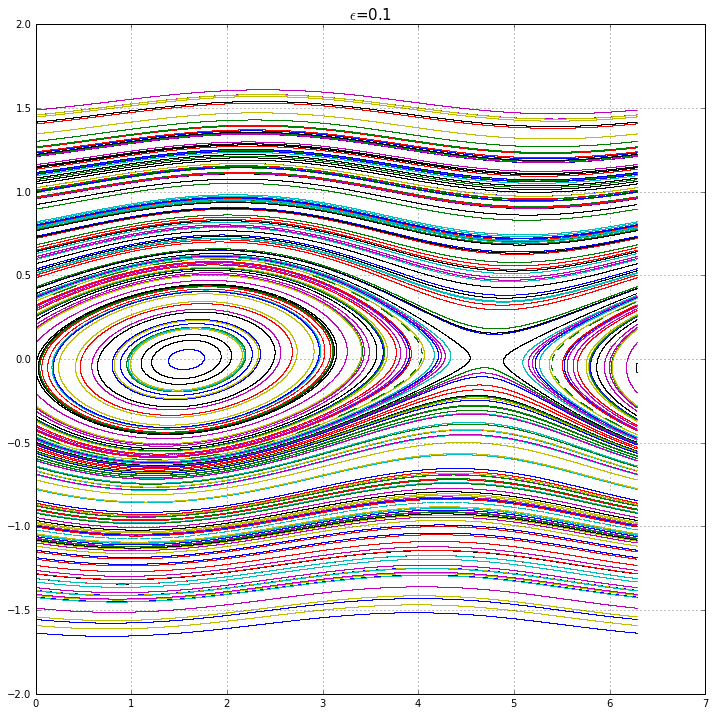

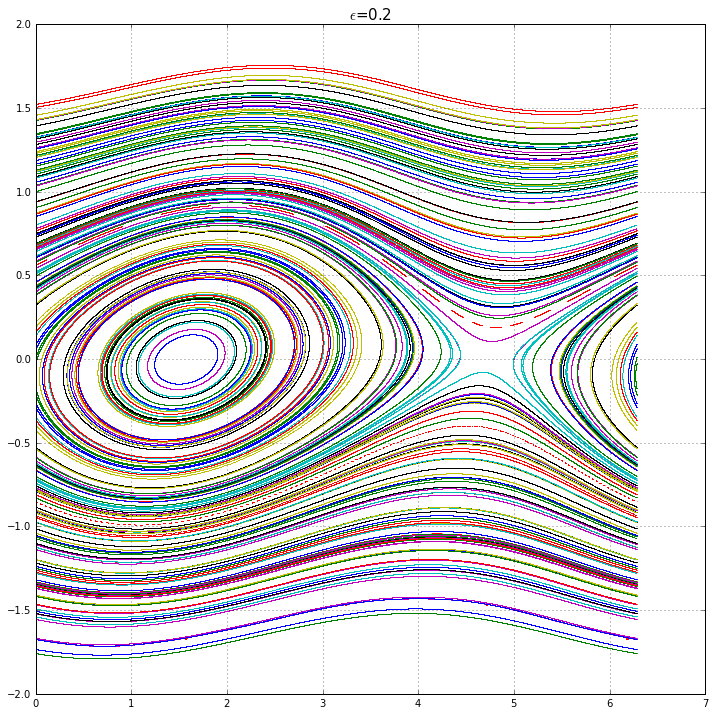

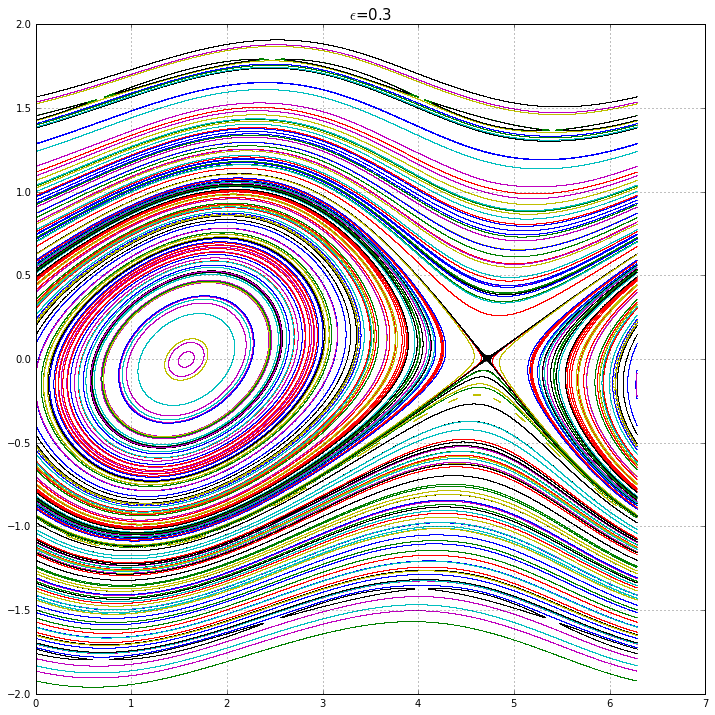

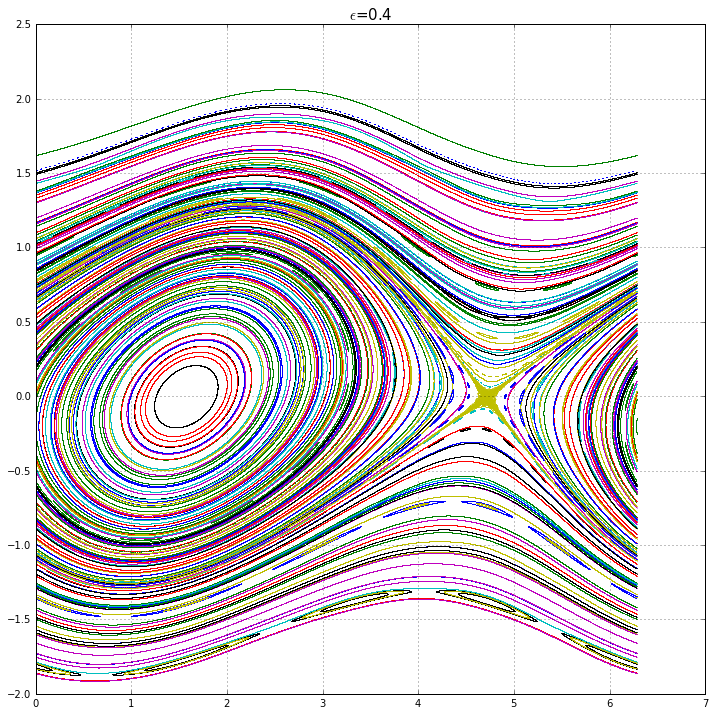

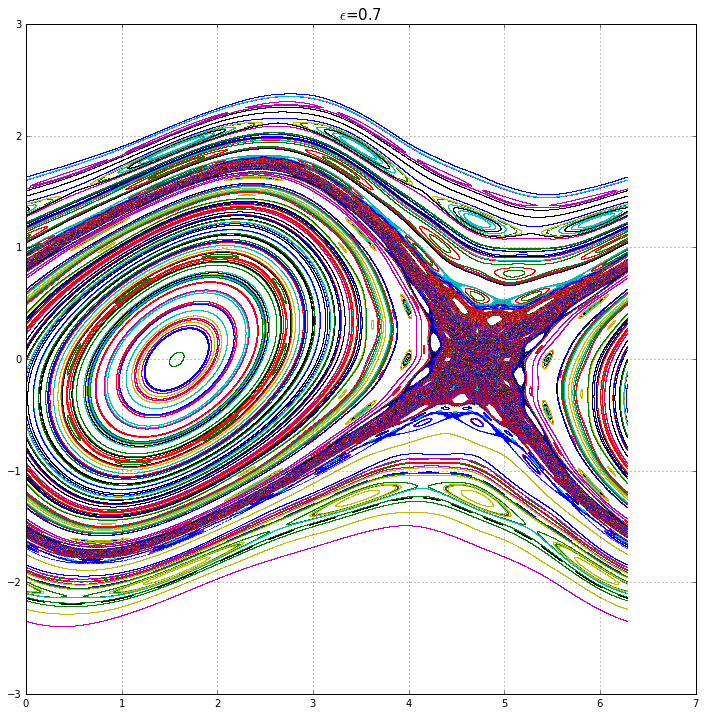

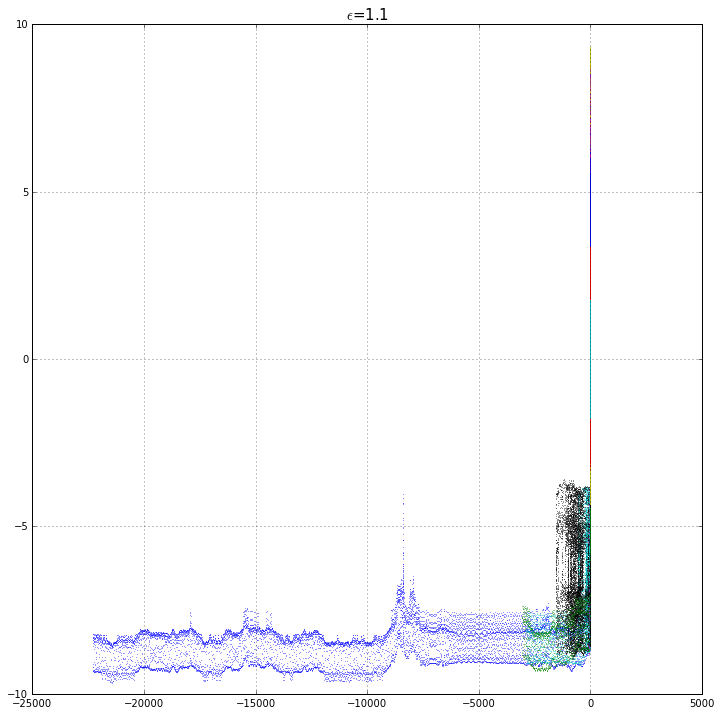

In [108]:
epsilon = array([0.01,0.05,0.1,0.2,0.3,0.4,0.7, 1.1]) # perturbaciones 
tau = 1
for i in range(len(epsilon)):
        grafica =subplots(figsize=(12,12))
        title('$\epsilon$=%s'%epsilon[i],fontsize=15)
        grid(True)
        for j in range(200):
            pto = condiciones(pi/2)
            #plot(pto[0],pto[1],'o')
            sol = zeros([len(t),2])
            sol[0] = pto
            for n in range(len(t)-1):
                sol[n+1]= mapeo(sol[n],tau,epsilon[i])
                if sol[n+1][0]>=(2*pi):
                     sol[n+1][0]=sol[n+1][0]%(2*pi)
                if sol[n+1][0]<0:
                    sol[n+1][0] = 2*pi+sol[n+1][0] 
            theta = [row[0] for row in sol]
            p = [row[1] for row in sol]
            plot(theta,p,'.',markersize = 0.5)
show()